In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sn

In [2]:
df=pd.read_csv("/content/indian_liver_patient.csv")
df

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1
...,...,...,...,...,...,...,...,...,...,...,...
578,60,Male,0.5,0.1,500,20,34,5.9,1.6,0.37,2
579,40,Male,0.6,0.1,98,35,31,6.0,3.2,1.10,1
580,52,Male,0.8,0.2,245,48,49,6.4,3.2,1.00,1
581,31,Male,1.3,0.5,184,29,32,6.8,3.4,1.00,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         583 non-null    int64  
 1   Gender                      583 non-null    object 
 2   Total_Bilirubin             583 non-null    float64
 3   Direct_Bilirubin            583 non-null    float64
 4   Alkaline_Phosphotase        583 non-null    int64  
 5   Alamine_Aminotransferase    583 non-null    int64  
 6   Aspartate_Aminotransferase  583 non-null    int64  
 7   Total_Protiens              583 non-null    float64
 8   Albumin                     583 non-null    float64
 9   Albumin_and_Globulin_Ratio  579 non-null    float64
 10  Dataset                     583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


In [4]:
df.isna().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Dataset                       0
dtype: int64

In [5]:
df.Albumin_and_Globulin_Ratio=df.Albumin_and_Globulin_Ratio.fillna(df.Albumin_and_Globulin_Ratio.mean())

In [6]:
def encode(df,column,positive):
  df=df.copy()
  df[column]=df[column].apply(lambda x:1 if x==positive else 0)
  return df

In [7]:
df=encode(df,'Dataset',2)

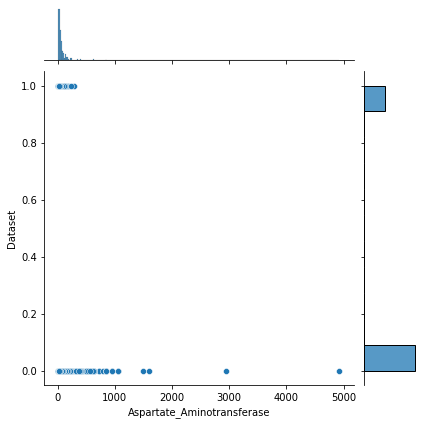

In [8]:
sn.jointplot(x='Aspartate_Aminotransferase',y='Dataset',data=df)

In [9]:
uv=np.percentile(df.Aspartate_Aminotransferase,[99])[0]
df.Aspartate_Aminotransferase[df.Aspartate_Aminotransferase>uv]=3*uv

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [10]:
df.describe()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000
mean,44.746141,3.298799,1.486106,290.576329,80.713551,117.623671,6.483190,3.141852,0.947064,0.286449
std,16.189833,6.209522,2.808498,242.937989,182.620356,318.474453,1.085451,0.795519,0.318492,0.452490
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,0.000000
25%,33.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,0.000000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.947064,0.000000
75%,58.000000,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000,1.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,2928.600000,9.600000,5.500000,2.800000,1.000000


In [11]:
df.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18.0,6.8,3.3,0.90,0
1,62,Male,10.9,5.5,699,64,100.0,7.5,3.2,0.74,0
2,62,Male,7.3,4.1,490,60,68.0,7.0,3.3,0.89,0
3,58,Male,1.0,0.4,182,14,20.0,6.8,3.4,1.00,0
4,72,Male,3.9,2.0,195,27,59.0,7.3,2.4,0.40,0


In [12]:
X=df.iloc[:,:10].values
Y=df.iloc[:,10].values
X,Y

(array([[65, 'Female', 0.7, ..., 6.8, 3.3, 0.9],
        [62, 'Male', 10.9, ..., 7.5, 3.2, 0.74],
        [62, 'Male', 7.3, ..., 7.0, 3.3, 0.89],
        ...,
        [52, 'Male', 0.8, ..., 6.4, 3.2, 1.0],
        [31, 'Male', 1.3, ..., 6.8, 3.4, 1.0],
        [38, 'Male', 1.0, ..., 7.3, 4.4, 1.5]], dtype=object),
 array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
        0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0,
        1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
        1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
        1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,
        1, 0, 0, 0

In [13]:
from sklearn.preprocessing import LabelEncoder
LabelEncoder_x2=LabelEncoder()
X[:,1]=LabelEncoder_x2.fit_transform(X[:,1])
X

array([[65, 0, 0.7, ..., 6.8, 3.3, 0.9],
       [62, 1, 10.9, ..., 7.5, 3.2, 0.74],
       [62, 1, 7.3, ..., 7.0, 3.3, 0.89],
       ...,
       [52, 1, 0.8, ..., 6.4, 3.2, 1.0],
       [31, 1, 1.3, ..., 6.8, 3.4, 1.0],
       [38, 1, 1.0, ..., 7.3, 4.4, 1.5]], dtype=object)

In [14]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=0)

In [15]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.fit_transform(X_test)

In [16]:
pd.DataFrame(X_train)

,0,1,2,3,4,5,6,7,8,9
0,0.613372,0.58561,-0.337893,-0.407837,-0.313453,-0.334502,-0.327014,-0.243259,-0.292782,-0.460489
1,-1.165788,0.58561,-0.353629,-0.407837,-0.524612,-0.193982,-0.154517,0.567089,0.694993,0.155778
2,1.288225,-1.70762,-0.400838,-0.443812,-0.528673,-0.318888,-0.311612,-0.063182,0.077634,0.155778
3,0.183919,-1.70762,-0.369366,-0.443812,-0.484005,-0.308480,-0.290050,-0.243259,-0.045838,0.155778
4,0.920123,0.58561,-0.274948,-0.299914,0.275355,0.753223,0.544710,-1.773915,-1.404029,-0.460489
...,...,...,...,...,...,...,...,...,...,...
461,0.920123,0.58561,-0.196266,-0.227966,-0.414972,-0.209595,-0.250006,-0.423336,-0.416254,-0.460489
462,0.613372,0.58561,-0.400838,-0.443812,-0.008897,-0.167960,-0.194561,0.296973,0.324577,0.155778
463,1.472276,-1.70762,-0.385102,-0.443812,-0.593645,-0.225209,-0.157598,1.737591,2.176656,1.388312
464,0.920123,0.58561,-0.149057,-0.299914,-0.081991,-0.032645,-0.216123,0.116896,0.448049,0.463912


In [17]:
from keras.models import Sequential
from keras.layers import Dense

In [18]:
cls=Sequential()
cls.add(Dense(units=100,kernel_initializer="uniform",activation='relu',input_dim=10))
cls.add(Dense(units=12,kernel_initializer='uniform',activation='relu'))
cls.add(Dense(units=6,kernel_initializer='uniform',activation='relu'))
cls.add(Dense(units=1,activation='sigmoid',kernel_initializer='uniform'))

In [19]:
cls.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [20]:
cls.fit(X_train,Y_train,batch_size=10,epochs=100)

Epoch 1/100
47/47 [==============================] - 1s 2ms/step - loss: 0.6875 - accuracy: 0.7124
Epoch 2/100
47/47 [==============================] - 0s 2ms/step - loss: 0.6375 - accuracy: 0.7253
Epoch 3/100
47/47 [==============================] - 0s 2ms/step - loss: 0.5311 - accuracy: 0.7253
Epoch 4/100
47/47 [==============================] - 0s 2ms/step - loss: 0.5138 - accuracy: 0.7253
Epoch 5/100
47/47 [==============================] - 0s 2ms/step - loss: 0.5086 - accuracy: 0.7253
Epoch 6/100
47/47 [==============================] - 0s 2ms/step - loss: 0.5029 - accuracy: 0.7253
Epoch 7/100
47/47 [==============================] - 0s 2ms/step - loss: 0.5019 - accuracy: 0.7253
Epoch 8/100
47/47 [==============================] - 0s 2ms/step - loss: 0.4977 - accuracy: 0.7253
Epoch 9/100
47/47 [==============================] - 0s 2ms/step - loss: 0.4958 - accuracy: 0.7253
Epoch 10/100
47/47 [==============================] - 0s 2ms/step - loss: 0.4950 - accuracy: 0.7253
Epoch 11/

In [21]:
Y_pred=cls.predict(X_test)
Y_pred=(Y_pred>0.5)
Y_pred

array([[False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [

In [22]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm=confusion_matrix(Y_test,Y_pred)
print(cm)
accuracy_score(Y_test,Y_pred)

[[76  2]
 [36  3]]


0.6752136752136753